<a href="https://colab.research.google.com/github/pornnakanok/bsc_dpdm22/blob/main/%5Bdataprep1%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/MyDrive/bsc_DPDM_data


In [3]:
!ls #ดูว่ามีไฟล์อะไรบ้าง

คำตอบนักประเมิน.xlsx


In [4]:
import pandas as pd

##บ้าน ชีท 1

In [5]:
home = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=0,skiprows=0)
home.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN


In [6]:
home.columns

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [7]:
home = home[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]

In [8]:
home.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

###คน 1

In [10]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [11]:
est1.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [12]:
mean_value=est1['ราคาทรัพย์'].mean()
mean_value

4004721.3114754097

In [13]:
est1['ราคาทรัพย์'].fillna(value=mean_value, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
est1.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [15]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,100.0,1.000000e+02,1.000000e+02
mean,1.0,4.004721e+06,3.938500e+06
std,0.0,2.366245e+06,2.368553e+06
min,1.0,3.900000e+05,6.000000e+05
25%,1.0,3.075000e+06,2.775000e+06
50%,1.0,4.004721e+06,3.600000e+06
75%,1.0,4.021041e+06,4.500000e+06
max,1.0,2.094900e+07,1.600000e+07


In [16]:
est1['ราคาทรัพย์'].min()

390000.0

In [17]:
est1['ราคาทรัพย์'].max()

20949000.0

In [18]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

###คน 2

In [20]:
est2 = home[home['ID ผู้ประเมิน']==2]
est2.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [21]:
est2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,90.0,6.100000e+01,8.900000e+01
mean,2.0,4.004721e+06,4.153258e+06
std,0.0,3.039496e+06,2.386901e+06
min,2.0,3.900000e+05,9.900000e+05
25%,2.0,2.500000e+06,2.600000e+06
50%,2.0,3.630000e+06,3.900000e+06
75%,2.0,4.774000e+06,4.900000e+06
max,2.0,2.094900e+07,1.700000e+07


In [22]:
est2.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [23]:
#fill NA with Text
est2['ให้คะแนนทรัพย์'] = est2['ให้คะแนนทรัพย์'].fillna('Unknown')

<ipython-input-23-fdb19b2c7778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ให้คะแนนทรัพย์'] = est2['ให้คะแนนทรัพย์'].fillna('Unknown')


In [24]:
est2.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                   False
dtype: bool

In [25]:
mean_value2=est2['ราคาทรัพย์'].mean()
mean_value2

4004721.3114754097

In [26]:
mean_value3=est2['ประเมินราคาซื้อ-ขาย'].mean()
mean_value3

4153258.4269662923

In [27]:
est2['ราคาทรัพย์'].fillna(value=mean_value2, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
est2['ประเมินราคาซื้อ-ขาย'].fillna(value=mean_value3, inplace=True)

In [29]:
est2.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### ความมั่นใจ

In [34]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [35]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### ให้คะแนนทรัพย์

In [36]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [32]:
est1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
1 ขายไม่ได้แน่นอน,1,1,1,1,1,1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,54,54,54,54,54,54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,43,43,43,43,43,43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2,2,2,2


In [37]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Unknown                                1
Name: ให้คะแนนทรัพย์, dtype: int64

In [33]:
est2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1,1,1,1,1,1
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,64,64,64,64,64,64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,23,23,23,23,23,23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,1,1,1,1,1,1
Unknown,1,1,1,1,1,1


#ที่ดิน

In [39]:
area = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=1,skiprows=0)
area.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN


In [41]:
area.groupby(['ID ผู้ประเมิน']).count()

,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
ID ผู้ประเมิน,,,,,,,,,,,,
1,100,100,100,40,100,100,0,100,10,10,0,1
2,100,100,100,40,100,100,0,100,10,10,0,0
4,10,10,10,10,7,7,3,7,7,7,0,0


In [45]:
area.columns

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [91]:
area = area[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
area.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,3000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


## คน 1

In [92]:
area1 = area[area['ID ผู้ประเมิน']==1]
area1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,1800000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,8000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,18000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [93]:
area1.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [94]:
mean_value3=area1['ราคาทรัพย์'].mean()
mean_value3

9865288.75

In [95]:
area1['ราคาทรัพย์'].fillna(value=mean_value3, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [96]:
area1.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## คน 2

In [97]:
area2 = area[area['ID ผู้ประเมิน']==2]
area2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [98]:
area2.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [99]:
mean_value4=area2['ราคาทรัพย์'].mean()
mean_value4

9865288.75

In [100]:
area2['ราคาทรัพย์'].fillna(value=mean_value4, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [101]:
area2.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

##ความมั่นใจ

In [103]:
area1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [104]:
area2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##ให้คะแนนทรัพย์

In [105]:
area1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,55,55,55,55,55,55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,45,45,45,45,45,45


In [106]:
area2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,52,52,52,52,52,52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,45,45,45,45,45,45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3,3,3,3,3,3


#คอนโด

In [56]:
condo = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=2,skiprows=0)
condo.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [57]:
condo.groupby(['ID ผู้ประเมิน']).count()

,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
ID ผู้ประเมิน,,,,,,,,,,
1,10,10,10,10,10,10,0,10,10,10


In [58]:
condo = condo[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
condo.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


## คน 1

In [59]:
condo1 = condo[condo['ID ผู้ประเมิน']==1]
condo1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [129]:
condo1.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

#ทาวน์โฮม

In [61]:
townhome = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=3,skiprows=0)
townhome.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN


In [62]:
townhome.groupby(['ID ผู้ประเมิน']).count()

,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
ID ผู้ประเมิน,,,,,,,,,,,,
1,120,120,120,61,120,120,0,120,0,0,0,1
2,120,120,120,61,120,120,0,120,0,0,0,0


In [63]:
townhome = townhome[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
townhome.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,1 ขายไม่ได้แน่นอน
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [130]:
townhome.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                        True
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [131]:
mean_value5=townhome['ราคาทรัพย์'].mean()
mean_value5

2011065.5737704919

In [132]:
townhome['ราคาทรัพย์'].fillna(value=mean_value5, inplace=True)

In [164]:
townhome.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## คน 1

In [64]:
th1 = townhome[townhome['ID ผู้ประเมิน']==1]
th1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


## คน 2

In [65]:
th2 = townhome[townhome['ID ผู้ประเมิน']==2]
th2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,1 ขายไม่ได้แน่นอน
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,1 ขายไม่ได้แน่นอน
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


## ความมั่นใจ

In [66]:
th1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [67]:
th2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## ให้คะแนนทรัพย์

In [68]:
th1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,14,14,14,14,11,14
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,100,100,100,100,45,100
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6,6,6,6,5,6


In [69]:
th2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
1 ขายไม่ได้แน่นอน,2,2,2,2,2,2
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,7,7,7,7,6,7
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,103,103,103,103,49,103
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,7,7,7,7,3,7
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,1,1,1,1,1,1


#อาคารพาณิชย์

In [70]:
building = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx',sheet_name=4,skiprows=0)
building.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN


In [71]:
building.groupby(['ID ผู้ประเมิน']).count()

,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
ID ผู้ประเมิน,,,,,,,,,,,,,
1,10,10,10,10,10,10,0,10,10,10,0,0,1
2,10,10,10,10,10,10,0,10,10,10,0,0,0


In [72]:
building = building[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
building.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [136]:
building.isnull().any() #ตรวจสอบค่าสูญหาย

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

## คน 1

In [73]:
building1 = building[building['ID ผู้ประเมิน']==1]
building1.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


## คน 2

In [74]:
building2 = building[building['ID ผู้ประเมิน']==2]
building2.head(3)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


## ความมั่นใจ

In [147]:
building1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [148]:
building2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## ให้คะแนนทรัพย์

In [149]:
building1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,5,5,5,5,5,5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3,3,3,3,3,3
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2,2,2,2


In [150]:
building2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,5,5,5,5,5,5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2,2,2,2,2,2
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3,3,3,3,3,3


# map ตารางของบ้าน

In [109]:
est2['ประเมิน1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2.head(3)

<ipython-input-109-c991ed221e91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมิน1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0


In [110]:
a = est2[['post id','ราคาทรัพย์','ประเมิน1','ประเมินราคาซื้อ-ขาย']]
a.head()

,post id,ราคาทรัพย์,ประเมิน1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0


In [111]:
a.rename(columns={'ประเมิน1': 'ประเมินโดย 1'}, inplace=True)
a.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0


In [112]:
a.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย 2'}, inplace=True)
a.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0


# map ตารางของที่ดิน

In [116]:
area2['ที่ดิน ประเมินโดย 1'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
area2.head()

<ipython-input-116-e59afa1bd6ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area2['ที่ดิน ประเมินโดย 1'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ที่ดิน ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000.0,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000.0,70000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000.0,60000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0


In [118]:
area2 = area2[['post id', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
        'ที่ดิน ประเมินโดย 1']]
area2.head()

,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ที่ดิน ประเมินโดย 1
1,https://nayoo.co/khonkaen/posts/1033,2800000.0,2000000.0,1800000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000.0,12000000.0,8000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000.0,70000000.0,18000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000.0,60000000.0,35000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000.0,2500000.0,2200000.0


In [120]:
b = area2[['post id','ราคาทรัพย์','ที่ดิน ประเมินโดย 1','ประเมินราคาซื้อ-ขาย']]
b.head()

,post id,ราคาทรัพย์,ที่ดิน ประเมินโดย 1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/1033,2800000.0,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000.0,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000.0,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000.0,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000.0,2200000.0,2500000.0


In [121]:
b.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ที่ดิน ประเมินโดย 2'}, inplace=True)
b.head(3)

,post id,ราคาทรัพย์,ที่ดิน ประเมินโดย 1,ที่ดิน ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000.0,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000.0,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000.0,18000000.0,70000000.0


# map ตารางทาวน์โฮม

In [167]:
th2['ทาวน์โฮม ประเมินโดย 1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2.head()

,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ทาวน์โฮม ประเมินโดย 1
1,https://nayoo.co/khonkaen/posts/548,1045000.0,1500000.0,700000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,1500000.0,700000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,4000000.0,3500000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3200000.0,3500000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,800000.0,1000000.0


In [168]:
th2 = th2[['post id', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
        'ทาวน์โฮม ประเมินโดย 1']]
th2.head()

,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ทาวน์โฮม ประเมินโดย 1
1,https://nayoo.co/khonkaen/posts/548,1045000.0,1500000.0,700000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,1500000.0,700000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,4000000.0,3500000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3200000.0,3500000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,800000.0,1000000.0


In [169]:
c = th2[['post id','ราคาทรัพย์','ทาวน์โฮม ประเมินโดย 1','ประเมินราคาซื้อ-ขาย']]
c.head()

,post id,ราคาทรัพย์,ทาวน์โฮม ประเมินโดย 1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0


In [170]:
c.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ทาวน์โฮม ประเมินโดย 2'}, inplace=True)
c.head(3)

,post id,ราคาทรัพย์,ทาวน์โฮม ประเมินโดย 1,ทาวน์โฮม ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0


In [171]:
c.isnull().any() #ตรวจสอบค่าสูญหาย

post id                  False
ราคาทรัพย์                True
ทาวน์โฮม ประเมินโดย 1    False
ทาวน์โฮม ประเมินโดย 2    False
dtype: bool

In [172]:
c['ราคาทรัพย์'].fillna(value=mean_value5, inplace=True)

In [173]:
c.isnull().any() #ตรวจสอบค่าสูญหาย

post id                  False
ราคาทรัพย์               False
ทาวน์โฮม ประเมินโดย 1    False
ทาวน์โฮม ประเมินโดย 2    False
dtype: bool

# map อาคารพาณิชย์

In [151]:
building2['อาคารพาณิชย์ ประเมินโดย 1'] = building2['post id'].map(building1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
building2.head()

<ipython-input-151-397283c0f531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building2['อาคารพาณิชย์ ประเมินโดย 1'] = building2['post id'].map(building1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,อาคารพาณิชย์ ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,13500000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2200000.0


In [152]:
d = building2[['post id','ราคาทรัพย์','อาคารพาณิชย์ ประเมินโดย 1','ประเมินราคาซื้อ-ขาย']]
d.head()

,post id,ราคาทรัพย์,อาคารพาณิชย์ ประเมินโดย 1,ประเมินราคาซื้อ-ขาย
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0


In [153]:
d.rename(columns={'ประเมินราคาซื้อ-ขาย': 'อาคารพาณิชย์ ประเมินโดย 2'}, inplace=True)
d.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,post id,ราคาทรัพย์,อาคารพาณิชย์ ประเมินโดย 1,อาคารพาณิชย์ ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0


#เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนของราคาตั้งขาย ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

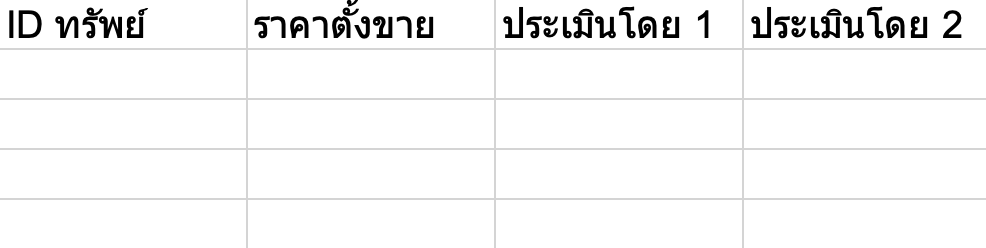

In [122]:
from sklearn.metrics import mean_absolute_percentage_error

## MAPE บ้าน

In [123]:
mean_absolute_percentage_error(a['ประเมินโดย 1'], a['ประเมินโดย 2'])

0.1356028256315807

In [124]:
mean_absolute_percentage_error(a['ประเมินโดย 2'], a['ประเมินโดย 1'])

0.1154689965085877

In [135]:
mean_absolute_percentage_error(a['ราคาทรัพย์'], a['ประเมินโดย 1'])

0.16634481025196451

In [157]:
mean_absolute_percentage_error(a['ราคาทรัพย์'], a['ประเมินโดย 2'])

0.18901803056843758

## MAPE ที่ดิน

In [127]:
mean_absolute_percentage_error(b['ที่ดิน ประเมินโดย 1'], b['ที่ดิน ประเมินโดย 2'])

0.7407933970315449

In [128]:
mean_absolute_percentage_error(b['ที่ดิน ประเมินโดย 2'], b['ที่ดิน ประเมินโดย 1'])

0.42747750827626985

In [159]:
mean_absolute_percentage_error(b['ราคาทรัพย์'], b['ที่ดิน ประเมินโดย 1'])

0.8212414484401621

In [160]:
mean_absolute_percentage_error(b['ราคาทรัพย์'], b['ที่ดิน ประเมินโดย 2'])

0.9841063002371848

## MAPE ทาวน์โฮม

In [174]:
mean_absolute_percentage_error(c['ทาวน์โฮม ประเมินโดย 1'], c['ทาวน์โฮม ประเมินโดย 2'])

0.1121168528826893

In [175]:
mean_absolute_percentage_error(c['ทาวน์โฮม ประเมินโดย 2'], c['ทาวน์โฮม ประเมินโดย 1'])

0.10619748830198178

In [176]:
mean_absolute_percentage_error(c['ราคาทรัพย์'], c['ทาวน์โฮม ประเมินโดย 1'])

0.2140240452621193

In [177]:
mean_absolute_percentage_error(c['ราคาทรัพย์'], c['ทาวน์โฮม ประเมินโดย 2'])

0.1993088121597759

## MAPE อาคารพาณิชย์

In [154]:
mean_absolute_percentage_error(d['อาคารพาณิชย์ ประเมินโดย 1'], d['อาคารพาณิชย์ ประเมินโดย 2'])

0.2158208906103643

In [155]:
mean_absolute_percentage_error(d['อาคารพาณิชย์ ประเมินโดย 2'], d['อาคารพาณิชย์ ประเมินโดย 1'])

0.1697142857142857

In [178]:
mean_absolute_percentage_error(d['ราคาทรัพย์'], d['อาคารพาณิชย์ ประเมินโดย 1'])

0.17643894993894996

In [179]:
mean_absolute_percentage_error(d['ราคาทรัพย์'], d['อาคารพาณิชย์ ประเมินโดย 2'])

0.11732295482295482

## MAPE คอนโด

In [156]:
mean_absolute_percentage_error(condo['ราคาทรัพย์'], condo['ประเมินราคาซื้อ-ขาย'])

0.17349265946250259